# About Dataset
This dataset contains the complete results of the 2024 Lok Sabha Elections, sourced directly from the Election Commission of India's official website through an automated script. The data was scraped on 5th June 2024, one day after the results were officially published.

Linledin : linkedin.com/in/mohdsameer28        
Follow on Github : SameerHussain128

### Objectives : Analysis of Lok Sabha 2024 Elections

In [1]:
%%html
<a id="1"></a>
<div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:250%;padding:7.0px; background: #cceeff; border-bottom: 5px solid #004466" >2024 Election result Analysis<br> <div> 

In [2]:
%%html

<div style="display: flex;">
    <img src="https://th.bing.com/th/id/OIP.MRbvvO-8Z__sSK2W2lXpZAHaFD?w=233&h=180&c=7&r=0&o=5&dpr=1.6&pid=1.4" alt="Image Alt Text">
    <p>As we all know that on June 4, 2024 Lok sabha elections result were released.
        <br>We got many breaking news this elections.<br>
        <br>This EDA will aim to make an overview like:-<br>
        <br>1. In next election where Parties can make better strategy.
        <br>2. Make a strong understanding where to choose strong candidate
        <br>3. What public wants
        <br>4. Deep analysis of lok sabha 2024 result </p>
</div>

In [3]:
# import Libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv("election_results_2024.csv")

# Exploratory Data Analysis (EDA) and Data Preprocessing

### Columns:
* Constituency: The name of the parliamentary constituency.
* Const. No.: The unique number assigned to each constituency.
* Leading Candidate: The name of the candidate who received the most votes in the constituency.
* Leading Party: The political party of the leading candidate.
* Trailing Candidate: The name of the candidate who received the second most votes.
* Trailing Party: The political party of the trailing candidate.
* Margin: The number of votes by which the leading candidate won.
* Status: The status of the result (e.g., "Result Declared"). 

In [5]:
df.head()

Constituency  Const. No.    Leading Candidate  \
0             AJMER          13  BHAGIRATH CHOUDHARY   
1             ALWAR           8      BHUPENDER YADAV   
2            AMBALA           1       VARUN CHAUDHRY   
3  ANANTNAG-RAJOURI           3     MIAN ALTAF AHMAD   
4         ARAKKONAM           7    S JAGATHRATCHAKAN   

                         Leading Party    Trailing Candidate  \
0               Bharatiya Janata Party  RAMCHANDRA CHOUDHARY   
1               Bharatiya Janata Party           LALIT YADAV   
2             Indian National Congress         BANTO KATARIA   
3  Jammu & Kashmir National Conference        MEHBOOBA MUFTI   
4            Dravida Munnetra Kazhagam             L VIJAYAN   

                             Trailing Party  Margin           Status  
0                  Indian National Congress  329991  Result Declared  
1                  Indian National Congress   48282  Result Declared  
2                    Bharatiya Janata Party   49036  Result Declared  
3  Jammu & Kashmir Peoples Democratic Party  281794  Result Declared  
4  All India Anna Dravida Munnetra Kazhagam  306559  Result Declared

In [6]:
df.shape

(543, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [8]:
# Understand the data
df.Status.value_counts()

Status
Result Declared    542
Uncontested          1
Name: count, dtype: int64

## Insights :
* There are 543 lok sabha seats 
* On 542 Result Declared and 1 seat it Uncontested

### Lets see which is that seat, constituency, candidate name and party

In [9]:
# Filter DataFrame to find the uncontested constituency
status = df[df['Status'] == 'Uncontested']

# Display the details of the uncontested constituency
print(status)

    Constituency  Const. No.               Leading Candidate  \
493        Surat          24  MUKESHKUMAR CHANDRAKAANT DALAL   

              Leading Party Trailing Candidate Trailing Party Margin  \
493  Bharatiya Janata Party                NaN            NaN      -   

          Status  
493  Uncontested  


In [10]:
if not status.empty:
    uncontested_details = status.iloc[0]
    print(f"Uncontested Constituency: {uncontested_details['Constituency']}")
    print(f"Constituency Number: {uncontested_details['Const. No.']}")
    print(f"Leading Candidate: {uncontested_details['Leading Candidate']}")
    print(f"Leading Party: {uncontested_details['Leading Party']}")
else:
    print("No uncontested constituencies found.")


Uncontested Constituency: Surat
Constituency Number: 24
Leading Candidate: MUKESHKUMAR CHANDRAKAANT DALAL
Leading Party: Bharatiya Janata Party


In [11]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

## Insights :
* There are only 2 NaN values in Trailing Candidate and Trailing Party

### As we got to know that one seat it Uncontested and opposite candidate directly won without any challenge
* I drop that one row

In [12]:
df.dropna(inplace=True,ignore_index=True)
df.shape

(542, 8)

In [13]:
df = df.drop(['Status'],axis="columns")

In [14]:
df.shape

(542, 7)

In [15]:
# Margin is in object i have to change it to integer
df["Margin"] = df["Margin"].astype(int)

In [16]:
# Sort by 'Margin and select top 20 rows
top_20 = df.sort_values(by='Margin',ascending=False).head(20)


# Create the bar plot

fig = px.bar(top_20,x='Leading Party', y='Margin', title='Top margin Achieved by party',
             color_discrete_sequence=['gold', 'silver', 'brown'])
fig.show()

In [17]:
# Sort by 'Margin' and select top 20 rows
top_20 = df.sort_values(by='Margin', ascending=False).head(20)

# Create the bar plot with random colors
fig = px.bar(top_20, x='Leading Party', y='Margin', title='Top Margins Achieved by Party',
             color='Leading Party', color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the plot
fig.show()

In [18]:
# Sort by 'Margin' and select top 20 rows
top_20 = df.sort_values(by='Margin', ascending=False).head(20)

# Define specific colors for each party
party_colors = {
    'Bharatiya Janata Party': 'Orange',
    'Indian National Congress': 'blue',
    'All India Trinamool Congress': 'Green',
    'Telugu Desham Party'    : 'yellow',
    'Dravida Munnetra Kazhagam' : 'Red'
}

# Create the bar plot with specific colors
fig = px.bar(top_20, x='Leading Party', y='Margin', title='Top Margins Achieved by Party',
             color='Leading Party', color_discrete_map=party_colors)

# Show the plot
fig.show()

### I want to see total how many parties are there in Lok sabha

In [19]:
# Count the number of unique parties
num_parties = df['Leading Party'].nunique()
print("")
# Print the number of parties participated
print("Number of parties participated:", num_parties)


Number of parties participated: 42


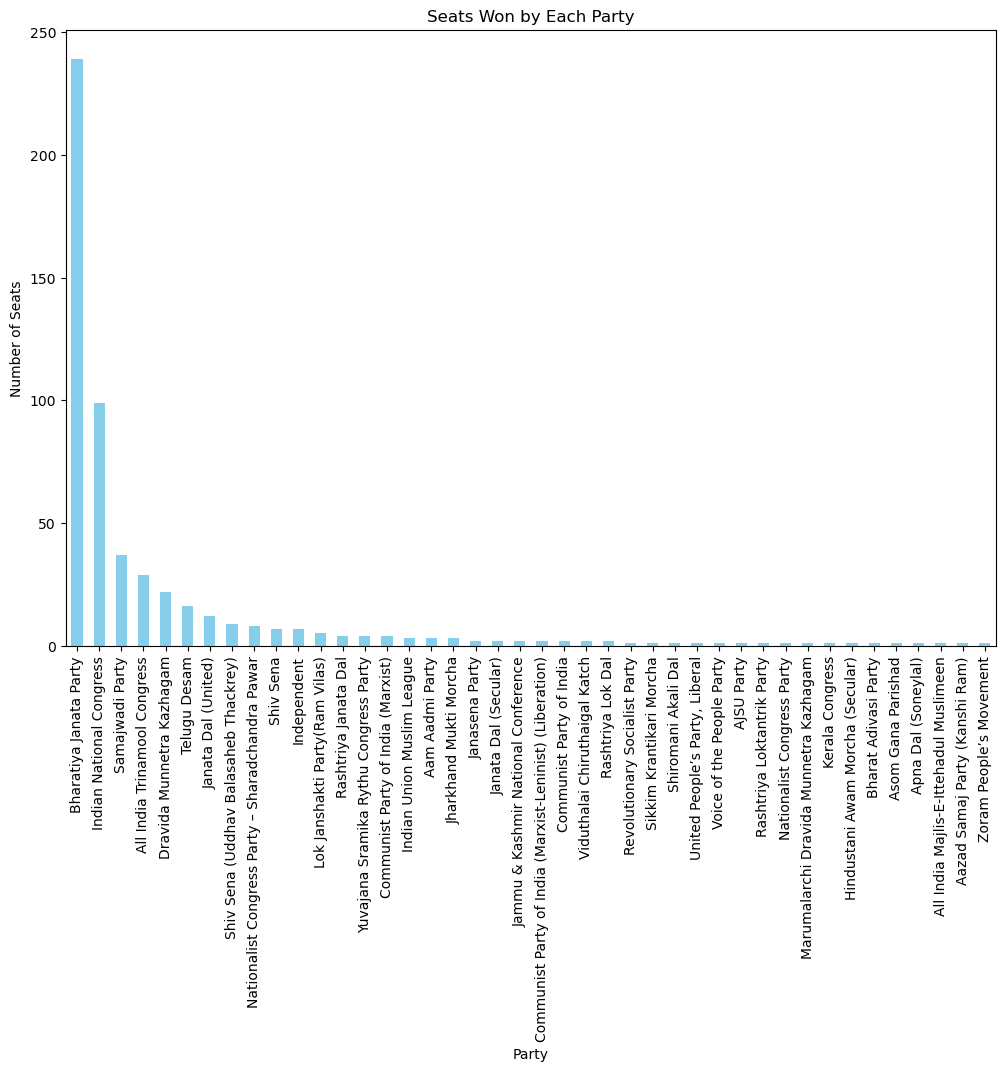

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing election results
# Group by 'Leading Party' and sum the number of seats won by each party
party_wise_seats = df.groupby('Leading Party').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
party_wise_seats.plot(kind='bar', color='skyblue')
plt.title('Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)
plt.show()


In [21]:
# for visualization of leading Party seat holdings
leads = df['Leading Party'].value_counts().head(20)

fig = px.pie(leads, names=leads.index, values=leads.values,
             title="Distribution of leading party's seat")
fig.show()

In [22]:
df['Leading Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Jammu & Kashmir National Conference', 'Dravida Munnetra Kazhagam',
       'Nationalist Congress Party – Sharadchandra Pawar',
       'Communist Party of India (Marxist)', 'Telugu Desam',
       'Samajwadi Party', 'Aam Aadmi Party',
       'Yuvajana Sramika Rythu Congress Party',
       'All India Trinamool Congress',
       'Communist Party of India (Marxist-Leninist) (Liberation)',
       'Shiv Sena', 'Rashtriya Janata Dal', 'Bharat Adivasi Party',
       'Independent', 'Rashtriya Lok Dal', 'Janata Dal (United)',
       'Asom Gana Parishad', 'Shiromani Akali Dal',
       'Viduthalai Chiruthaigal Katch', 'Jharkhand Mukti Morcha',
       'Hindustani Awam Morcha (Secular)', 'AJSU Party',
       'Lok Janshakti Party(Ram Vilas)',
       'Shiv Sena (Uddhav Balasaheb Thackrey)',
       'All India Majlis-E-Ittehadul Muslimeen', 'Janasena Party',
       'United People’s Party, Liberal', 'Janata Dal (Secular)',
       'Revolut

In [23]:
# Group by 'Leading Party' and count the occurrences
party_counts = df.groupby('Leading Party').size()

# Calculate total seats
total_seats = party_counts.sum() + 1  # Adding 1

# Print party counts and total seats
print("Party Counts:")
print(party_counts)
print()
print('Total seats are 542')
print("1 seat of surat with unfair bjp won" )
print("\nTotal Seats:", total_seats)

Party Counts:
Leading Party
AJSU Party                                                    1
Aam Aadmi Party                                               3
Aazad Samaj Party (Kanshi Ram)                                1
All India Majlis-E-Ittehadul Muslimeen                        1
All India Trinamool Congress                                 29
Apna Dal (Soneylal)                                           1
Asom Gana Parishad                                            1
Bharat Adivasi Party                                          1
Bharatiya Janata Party                                      239
Communist Party of India                                      2
Communist Party of India (Marxist)                            4
Communist Party of India (Marxist-Leninist) (Liberation)      2
Dravida Munnetra Kazhagam                                    22
Hindustani Awam Morcha (Secular)                              1
Independent                                                   7
Indian Natio

## Insights : Parties standing with their Seats
* Bharatiya Janata Party (BJP) with highest no.of seats = 239 + 1 = 240
* The 1 seat bjp got in surat is no other candidate participate, only bjp candidate participated and won
* 1 seat of Surat is unfair elected
* Indian National Congress (INC) is the second party with 99 seats

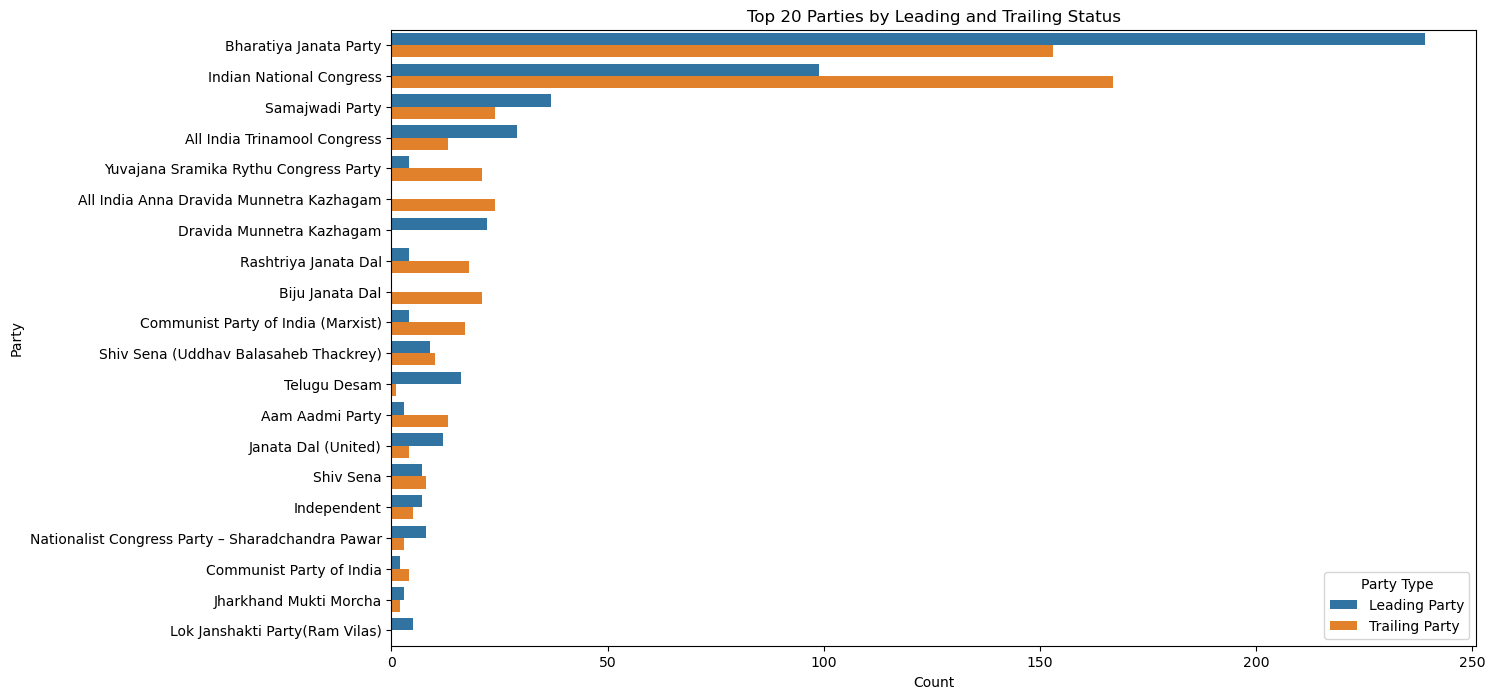

In [24]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()
leading_vs_trailing_parties(df, n=20)

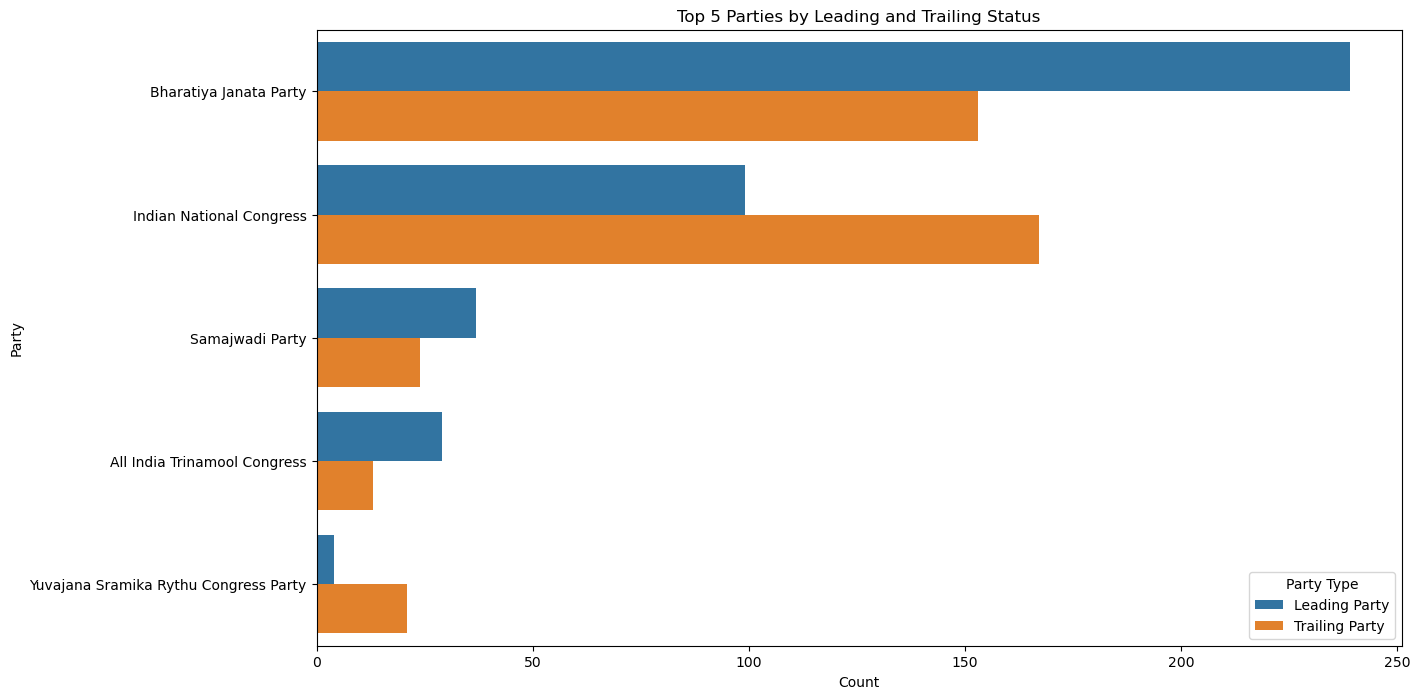

In [25]:
def leading_vs_trailing_parties(df, n=5):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()
leading_vs_trailing_parties(df, n=5)

## Insights :
* Top 20 parties with its Leading status and Trailing status
* Blue Color represent Leading and Orange represent Trailing
* bjp has more leading staus
* inc has more trailing status

In [26]:
import pandas as pd

# Create a dictionary with party names as keys and their respective vote shares as values
party_vote_share = {
    "BJP": 36.56,
    "INC": 21.19,
    "Others": 7.03,
    "SP": 4.58,
    "AITC": 4.37,
    "YSRCP": 2.06,
    "BSP": 2.04,
    "TDP": 1.98,
    "DMK": 1.82,
    "CPI(M)": 1.76,
    "RJD": 1.57,
    "SHSUBT": 1.48,
    "BJD": 1.46,
    "ADMK": 1.39,
    "JD(U)": 1.25,
    "SHS": 1.15,
    "AAAP": 1.11,
    "NOTA": 0.99,
    "NCPSP": 0.92,
    "BHRS": 0.57,
    "CPI": 0.49,
    "LJPRV": 0.44,
    "JMM": 0.41,
    "JD(S)": 0.34,
    "NCP": 0.32,
    "SAD": 0.28,
    "IUML": 0.27,
    "CPI(ML)(L)": 0.27,
    "AIMIM": 0.22,
    "AGP": 0.20,
    "JKN": 0.18,
    "DMDK": 0.17,
    "ADAL": 0.13,
    "BOPF": 0.12,
    "AIUDF": 0.10,
    "RLTP": 0.09,
    "VOTPP": 0.09,
    "UPPL": 0.08,
    "AJSUP": 0.07,
    "JKPDP": 0.07,
    "NPEP": 0.06,
    "NDPP": 0.05,
    "NPF": 0.05,
    "KEC(M)": 0.04,
    "AIFB": 0.04,
    "INLD": 0.04,
    "SKM": 0.03,
    "ZPM": 0.03,
    "JNJP": 0.02,
    "MNF": 0.02,
    "SDF": 0.01,
    "RVLTGONP": 0.01,
    "UDP": 0.01,
    "JKNPPB": 0.0
}

# Convert the dictionary to a DataFrame
df_party_vote_share = pd.DataFrame.from_dict(party_vote_share, orient='index', columns=['Vote Share'])

# Sort the DataFrame by vote share in descending order
df_party_vote_share = df_party_vote_share.sort_values(by='Vote Share', ascending=False)

# Display the DataFrame
df_party_vote_share

Vote Share
BJP              36.56
INC              21.19
Others            7.03
SP                4.58
AITC              4.37
YSRCP             2.06
BSP               2.04
TDP               1.98
DMK               1.82
CPI(M)            1.76
RJD               1.57
SHSUBT            1.48
BJD               1.46
ADMK              1.39
JD(U)             1.25
SHS               1.15
AAAP              1.11
NOTA              0.99
NCPSP             0.92
BHRS              0.57
CPI               0.49
LJPRV             0.44
JMM               0.41
JD(S)             0.34
NCP               0.32
SAD               0.28
CPI(ML)(L)        0.27
IUML              0.27
AIMIM             0.22
AGP               0.20
JKN               0.18
DMDK              0.17
ADAL              0.13
BOPF              0.12
AIUDF             0.10
RLTP              0.09
VOTPP             0.09
UPPL              0.08
AJSUP             0.07
JKPDP             0.07
NPEP              0.06
NDPP              0.05
NPF               0.05
KEC(M)            0.04
AIFB              0.04
INLD              0.04
SKM               0.03
ZPM               0.03
JNJP              0.02
MNF               0.02
SDF               0.01
RVLTGONP          0.01
UDP               0.01
JKNPPB            0.00

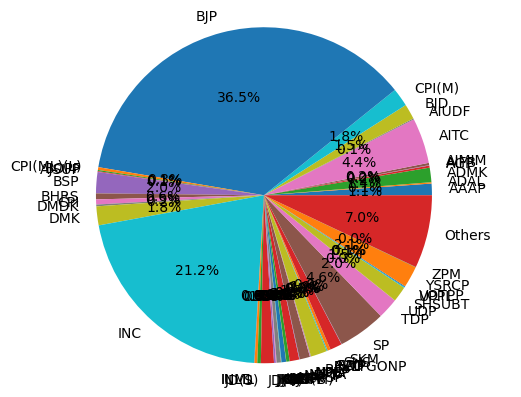

In [27]:
import matplotlib.pyplot as plt

party_wise_vote_share = {
    "AAAP": 1.11,
    "ADAL": 0.13,
    "ADMK": 1.39,
    "AGP": 0.20,
    "AIFB": 0.04,
    "AIMIM": 0.22,
    "AITC": 4.37,
    "AIUDF": 0.10,
    "BJD": 1.46,
    "CPI(M)": 1.76,
    "BJP": 36.56,
    "CPI(ML)(L)": 0.27,
    "BOPF": 0.12,
    "AJSUP": 0.07,
    "BSP": 2.04,
    "BHRS": 0.57,
    "CPI": 0.49,
    "DMDK": 0.17,
    "DMK": 1.82,
    "INC": 21.19,
    "INLD": 0.04,
    "IUML": 0.27,
    "JD(S)": 0.34,
    "JD(U)": 1.25,
    "JKN": 0.18,
    "JKNPPB": 0.00,
    "JKPDP": 0.07,
    "JMM": 0.41,
    "JNJP": 0.02,
    "KEC(M)": 0.04,
    "LJPRV": 0.44,
    "MNF": 0.02,
    "NCP": 0.32,
    "NCPSP": 0.92,
    "NDPP": 0.05,
    "NOTA": 0.99,
    "NPEP": 0.06,
    "NPF": 0.05,
    "RJD": 1.57,
    "RLTP": 0.09,
    "RVLTGONP": 0.01,
    "SAD": 0.28,
    "SDF": 0.01,
    "SHS": 1.15,
    "SKM": 0.03,
    "SP": 4.58,
    "TDP": 1.98,
    "UDP": 0.01,
    "SHSUBT": 1.48,
    "UPPL": 0.08,
    "VOTPP": 0.09,
    "YSRCP": 2.06,
    "ZPM": 0.03,
    "Others": 7.03
}

labels = list(party_wise_vote_share.keys())
sizes = list(party_wise_vote_share.values())

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [28]:
total_parties = df_party_vote_share.shape[0]
print("Number of parties participated in Lok sabha 2024 election : ", total_parties)
print('including NOTA')

Number of parties participated in Lok sabha 2024 election :  54
including NOTA


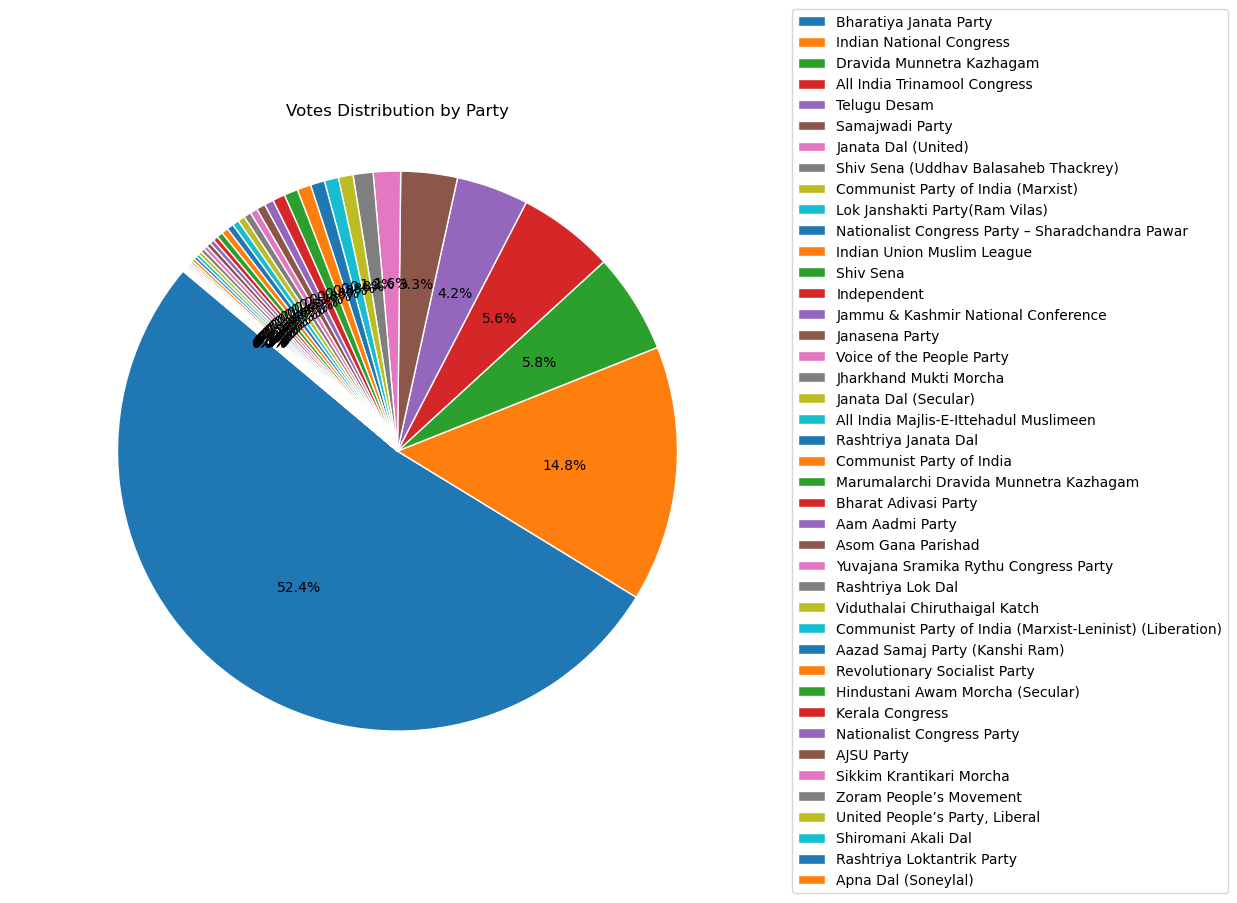

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv('election_results_2024.csv')

# Ensure 'Margin' column is numeric
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Drop rows where 'Margin' is NaN after conversion (if any)
df = df.dropna(subset=['Margin'])

# Group by 'Leading Party' and sum the 'Margin'
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

# Add a legend
plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# Show the plot
plt.show()


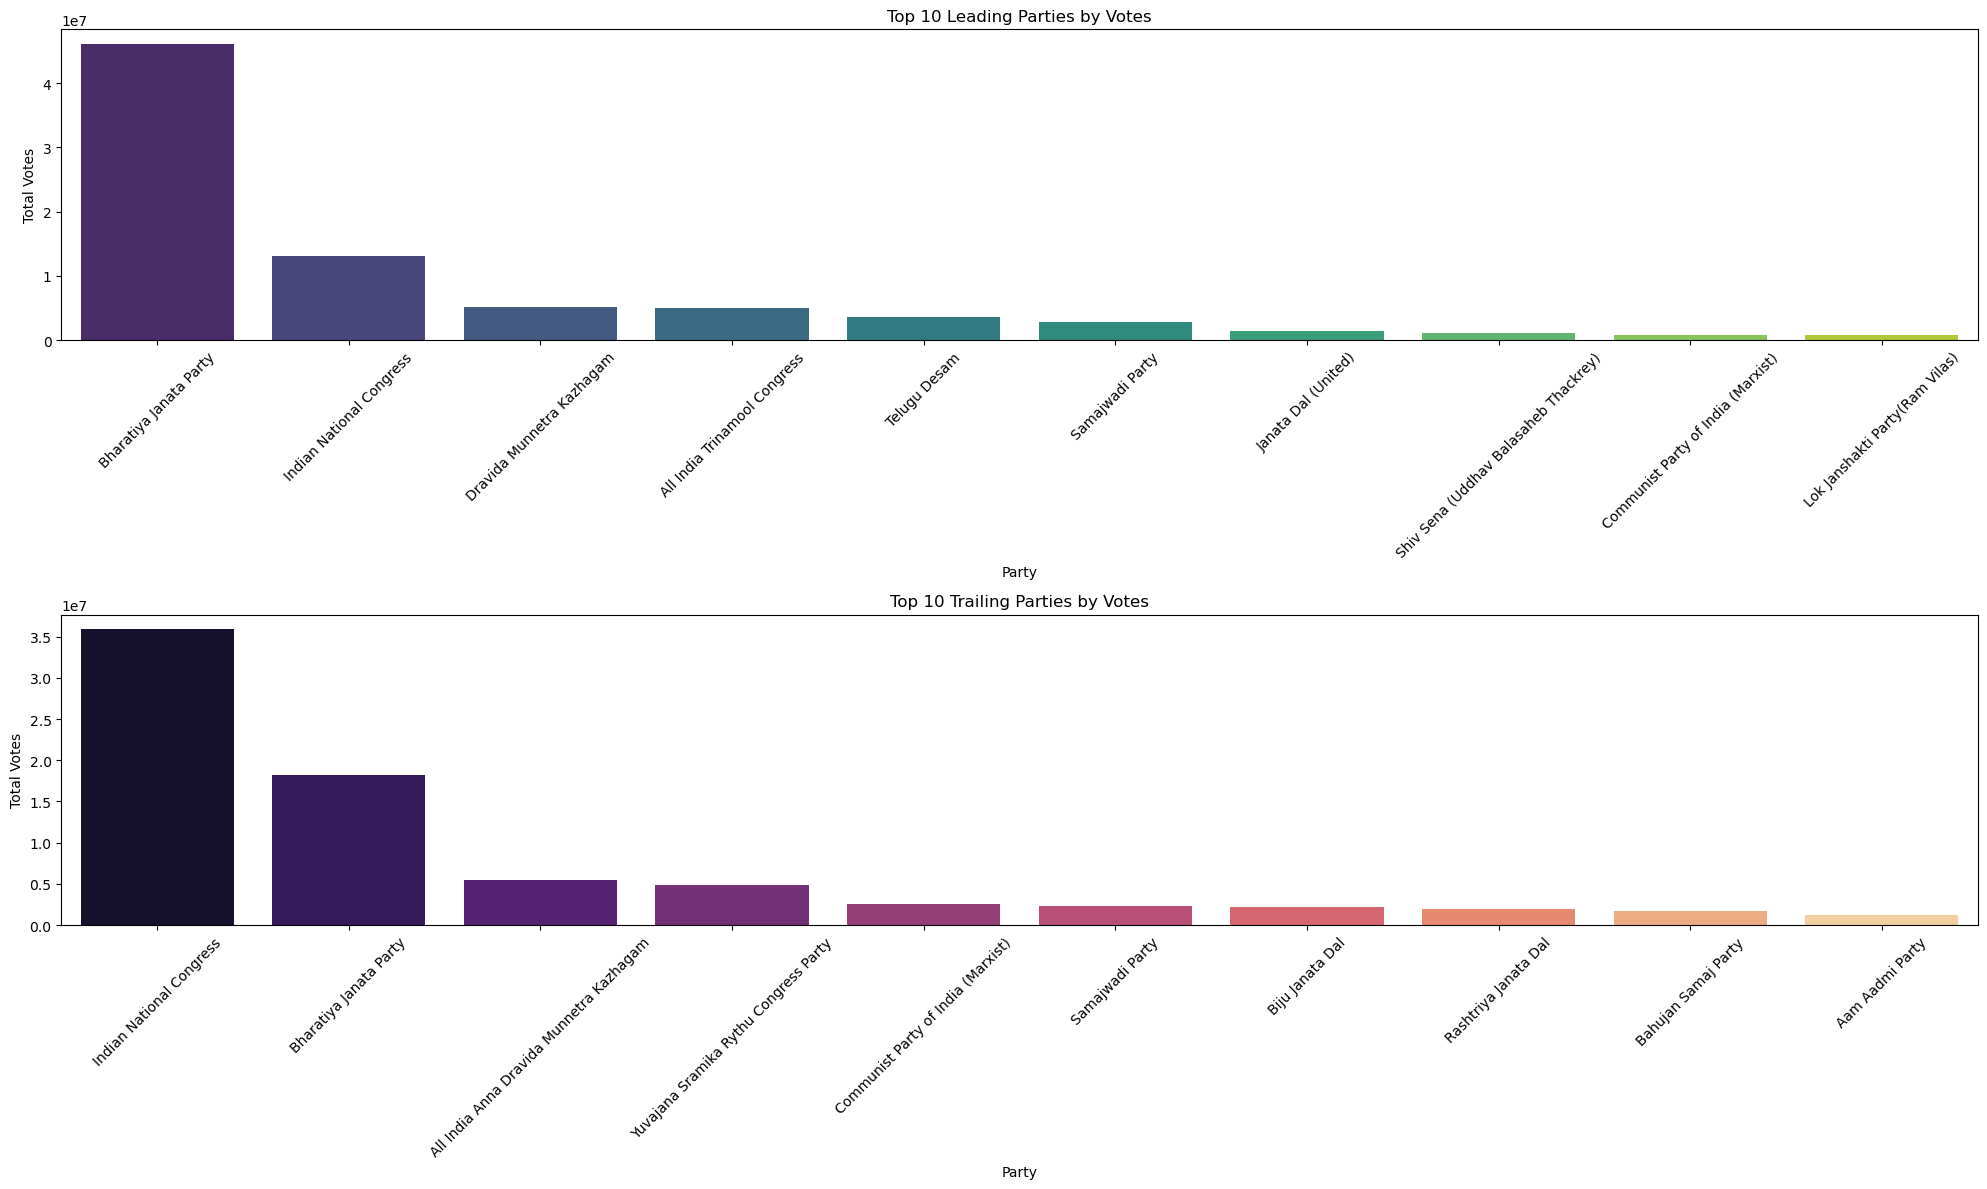

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_csv('election_results_2024.csv')

# Ensure 'Margin' column is numeric
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Drop rows where 'Margin' is NaN after conversion (if any)
df = df.dropna(subset=['Margin'])

# Group by 'Leading Party' and 'Trailing Party' and sum the 'Margin'
leading_party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_votes = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 12))

# Plot votes distribution by leading party
plt.subplot(2, 1, 1)
sns.barplot(x=leading_party_votes.index[:10], y=leading_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

# Plot votes distribution by trailing party
plt.subplot(2, 1, 2)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='magma')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Dravida Munnetra Kazhagam'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Telugu Desam'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Communist Party of India (Marxist)'),
  Text(9, 0, 'Lok Janshakti Party(Ram Vilas)')])

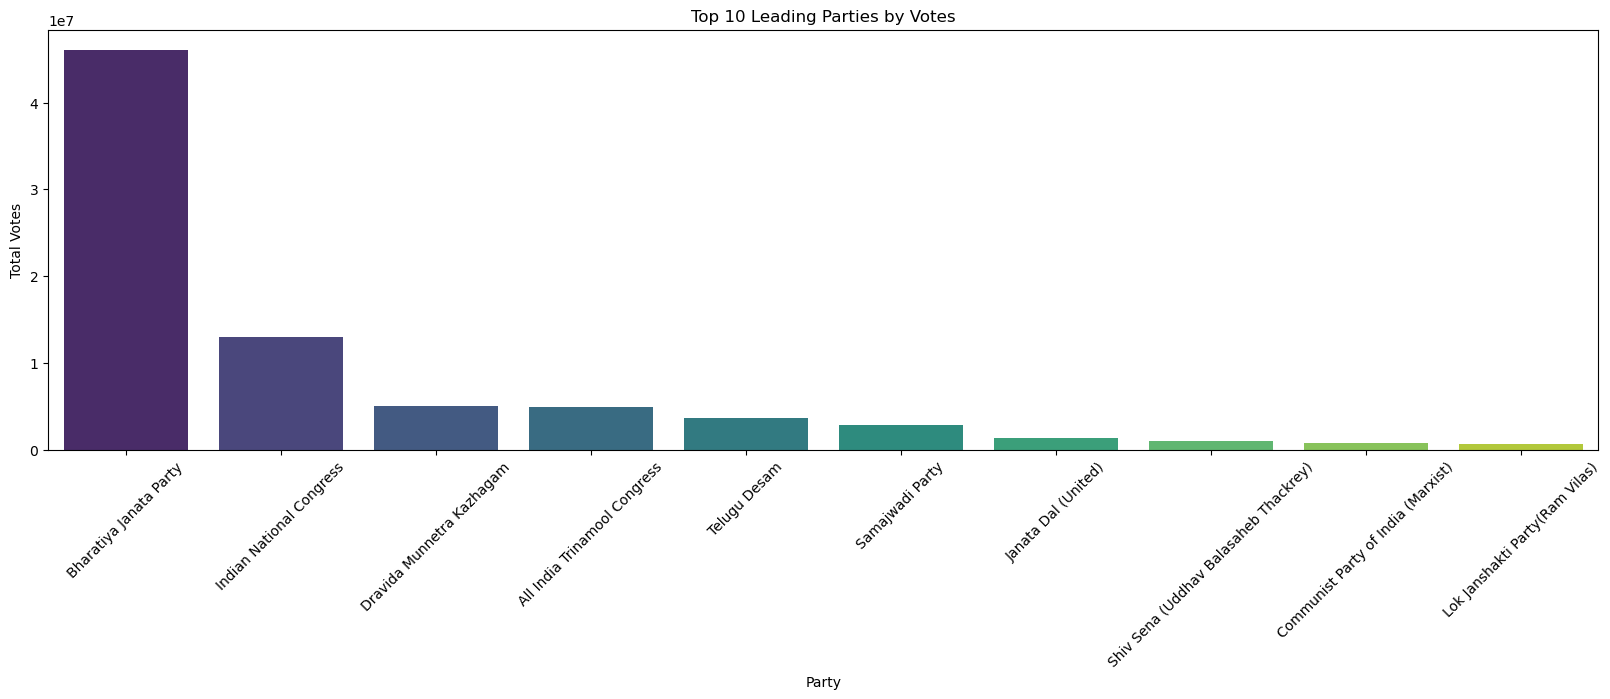

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_csv('election_results_2024.csv')

# Ensure 'Margin' column is numeric
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Drop rows where 'Margin' is NaN after conversion (if any)
df = df.dropna(subset=['Margin'])

# Group by 'Leading Party' and 'Trailing Party' and sum the 'Margin'
leading_party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 12))

# Plot votes distribution by leading party
plt.subplot(2, 1, 1)
sns.barplot(x=leading_party_votes.index[:10], y=leading_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

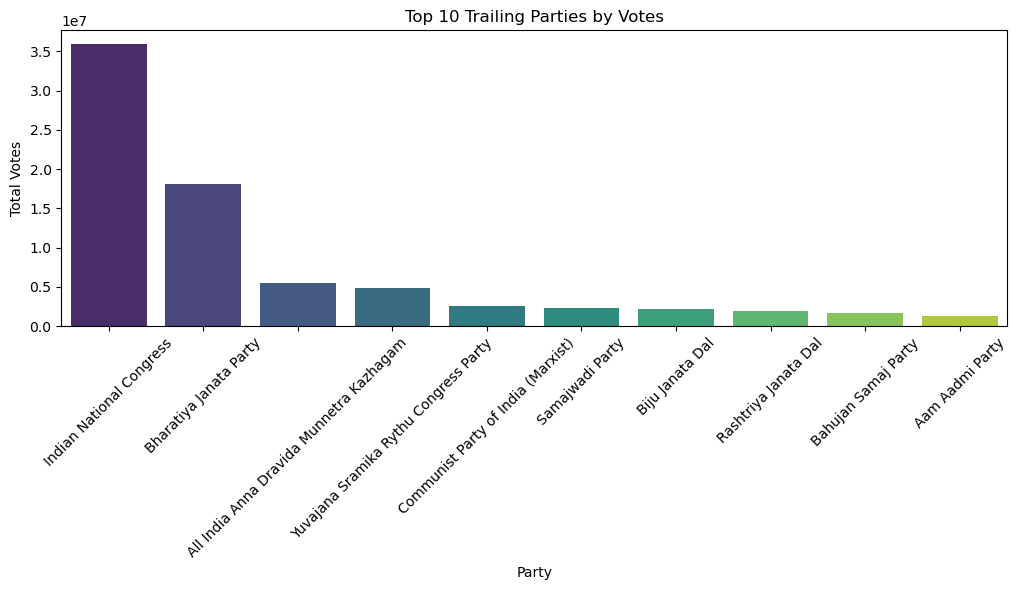

In [32]:
# Ensure 'Margin' column is numeric
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Drop rows where 'Margin' is NaN after conversion (if any)
df = df.dropna(subset=['Margin'])

# Group by 'Trailing Party' and sum the 'Margin'
trailing_party_votes = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\SAMEER\AppData\Local\Temp\ipykernel_4744\947287871.py:24: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



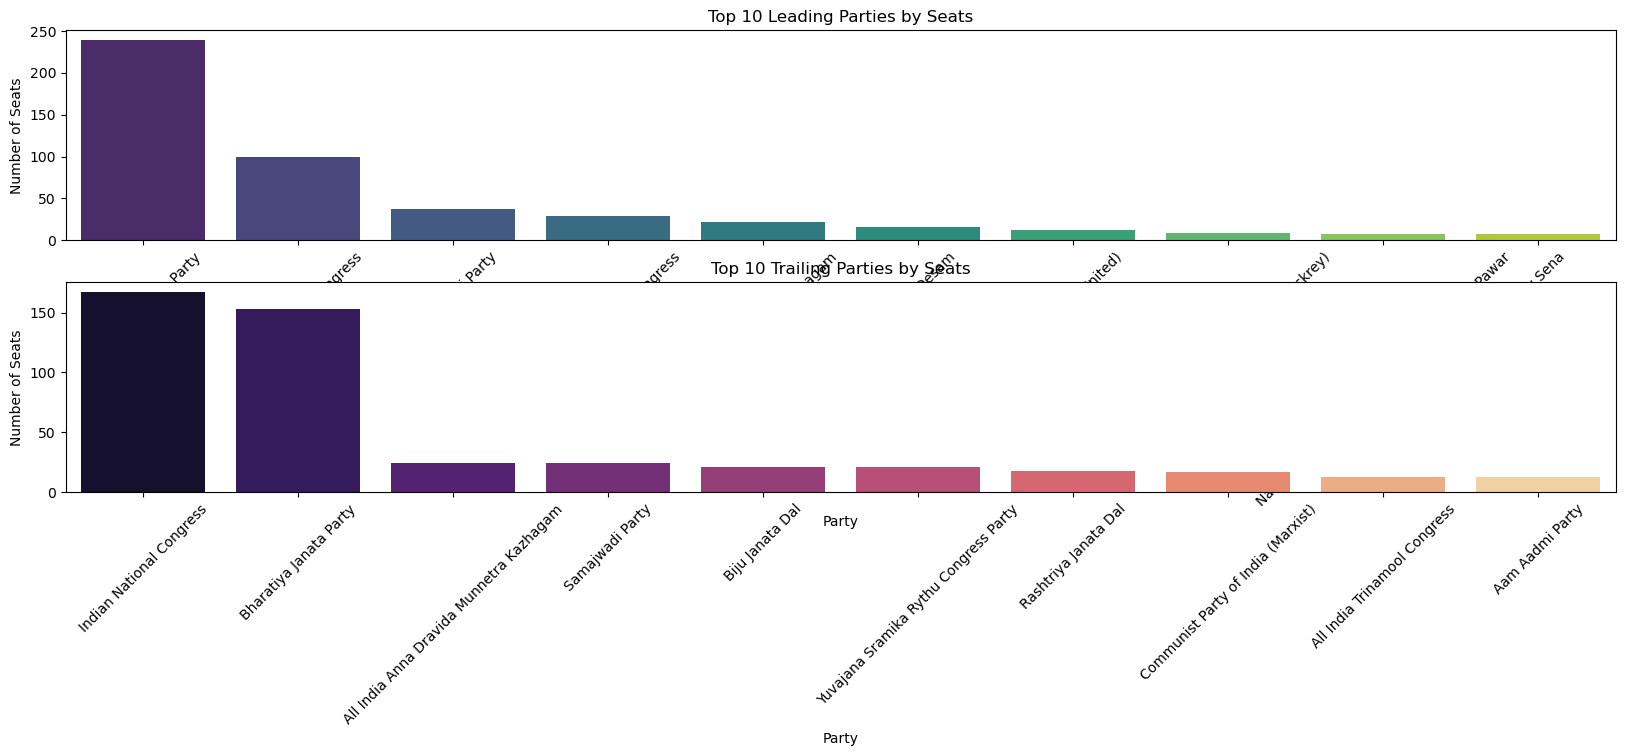

In [33]:
# Group by 'Leading Party' and 'Trailing Party' and count the number of seats
leading_party_seats = df['Leading Party'].value_counts()
trailing_party_seats = df['Trailing Party'].value_counts()

# Plotting
plt.figure(figsize=(20, 6))

# Plot seats distribution by leading party
plt.subplot(2, 1, 1)
sns.barplot(x=leading_party_seats.index[:10], y=leading_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Leading Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

# Plot seats distribution by trailing party
plt.subplot(2, 1, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='magma')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Samajwadi Party'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Dravida Munnetra Kazhagam'),
  Text(5, 0, 'Telugu Desam'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Nationalist Congress Party – Sharadchandra Pawar'),
  Text(9, 0, 'Shiv Sena')])

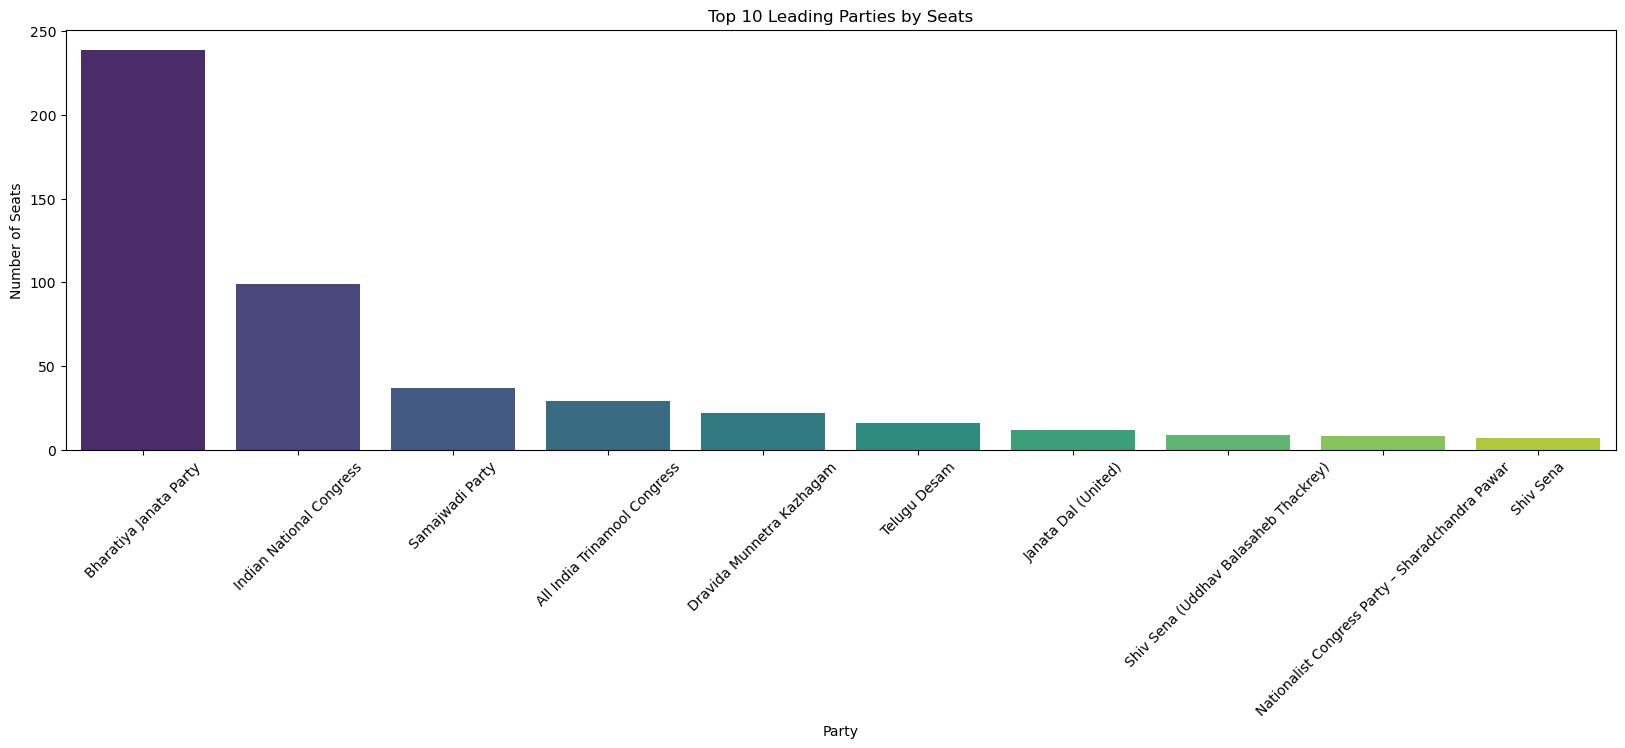

In [34]:
# Group by 'Leading Party' and 'Trailing Party' and count the number of seats
leading_party_seats = df['Leading Party'].value_counts()

# Plotting
plt.figure(figsize=(20, 12))

# Plot seats distribution by leading party
plt.subplot(2, 1, 1)
sns.barplot(x=leading_party_seats.index[:10], y=leading_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Leading Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

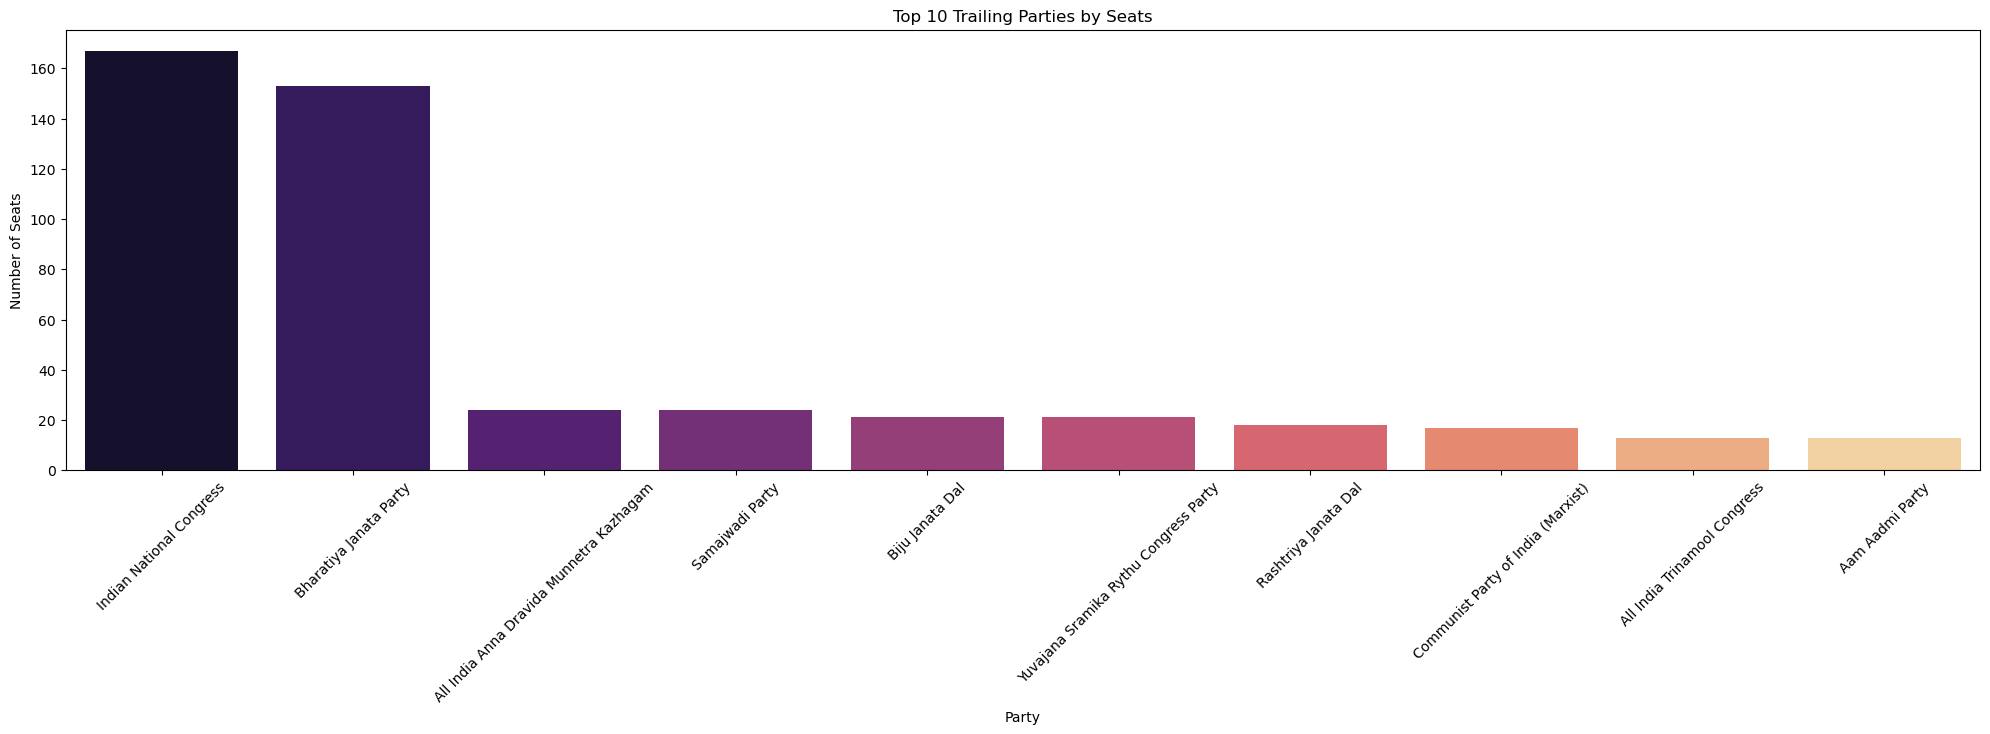

In [35]:
# Group by 'Leading Party' and 'Trailing Party' and count the number of seats
trailing_party_seats = df['Trailing Party'].value_counts()

# Plotting
plt.figure(figsize=(20, 12))

# Plot seats distribution by trailing party
plt.subplot(2, 1, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='magma')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

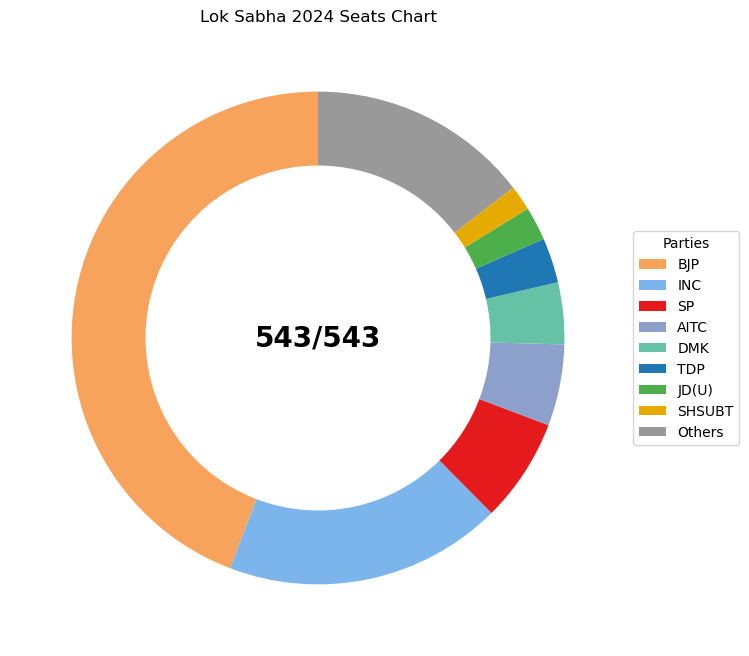

In [36]:
from math import pi

# Sample data (replace this with your actual data)
data = {
    'Party': ['BJP', 'INC', 'SP', 'AITC', 'DMK', 'TDP', 'JD(U)', 'SHSUBT', 'Others'],
    'Seats': [240, 99, 37, 29, 22, 16, 12, 9, 79]  # Example seat counts, replace with actual data
}

# Create DataFrame
df = pd.DataFrame(data)

# Define number of seats
total_seats = df['Seats'].sum()

# Create color mapping for parties
colors = {
    'BJP': '#f7a35c',
    'INC': '#7cb5ec',
    'SP': '#e41a1c',
    'AITC': '#8da0cb',
    'DMK': '#66c2a5',
    'TDP': '#1f78b4',
    'JD(U)': '#4daf4a',
    'SHSUBT': '#e6ab02',
    'NCPSP': '#a65628',
    'SHS': '#f781bf',
    'Others': '#999999'
}

# Generate angles for wedges
angles = [seat / total_seats * pi for seat in df['Seats']]

# Plot parliament chart
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

# Draw wedges
wedges, texts = ax.pie(df['Seats'], startangle=90, colors=[colors[party] for party in df['Party']], wedgeprops=dict(width=0.3))

# Add center text
ax.text(0, 0, f'{total_seats}/{total_seats}', ha='center', va='center', fontsize=20, weight='bold')

# Add legend
ax.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Lok Sabha 2024 Seats Chart')
plt.show()


## Insights Findings 
* Comparing from 2019 year election to 2024 year many things have came forward
* Bjp won with great difficulties, huge lost happend to bjp
* Congress improved a lot this year performed very well
* One lok sabha seat in surat was Uncontested and unfair competition so this need to improve and must it fair
* Some parties improved well and some parties lost seats
* Bjp lost 63 seats in 2024 compare to 2019
* No party touched Majority mark to rule in india

Linledin : linkedin.com/in/mohdsameer28        
Follow on Github : SameerHussain128